<a href="https://colab.research.google.com/github/Uros-Males/Minimization_Problem_On_Identical_Machines_Analysis/blob/main/MIXED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IN PROGRESS....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
import time
import keras

df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y_cp = shuffled.loc[:,'CPLEXStatus']

In [2]:
from imblearn.over_sampling import RandomOverSampler

names = [ 'av.length','max','std.dev', 'n', 'm']
X_modified = X.drop([ 'k', 'n/m', 'median', 'range',   'min','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)
#_modified['n/m'] = X_modified['n/m']
print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_cp = oversample.fit_resample(X_modified, y_cp)

     n   m   av.length     std.dev   max
0  132  48  101.159088   20.604170   142
1   22   2  102.181816   24.102236   150
2  140  56   74.778572   14.369768   100
3  198  44  811.631287  183.575378  1306
4   18   2   45.222221   15.611292    69


In [3]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_cp, random_state=0, train_size = 0.83)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.83)
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
X_val_copy = X_val
X_val = sc.transform(X_val)

10104
2070
2494


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()
classifier.add(Dense(4, input_dim = X_modified.shape[1], activation='relu'))

classifier.add(Dense(8, activation = 'relu'))

classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.5))

classifier.add(Dense(8, activation='relu'))

classifier.add(Dense(4, activation='relu'))
classifier.add(Dense(1, activation = 'sigmoid'))
classifier.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['binary_accuracy'])

Epoch 1/600
405/405 [==============================] - 3s 5ms/step - loss: 0.3794 - binary_accuracy: 0.8627 - val_loss: 0.1714 - val_binary_accuracy: 0.9377
Epoch 2/600
405/405 [==============================] - 1s 4ms/step - loss: 0.1894 - binary_accuracy: 0.9357 - val_loss: 0.1546 - val_binary_accuracy: 0.9396
Epoch 3/600
405/405 [==============================] - 1s 4ms/step - loss: 0.1771 - binary_accuracy: 0.9404 - val_loss: 0.1435 - val_binary_accuracy: 0.9454
Epoch 4/600
405/405 [==============================] - 2s 4ms/step - loss: 0.1667 - binary_accuracy: 0.9399 - val_loss: 0.1367 - val_binary_accuracy: 0.9507
Epoch 5/600
405/405 [==============================] - 2s 4ms/step - loss: 0.1552 - binary_accuracy: 0.9413 - val_loss: 0.1311 - val_binary_accuracy: 0.9507
Epoch 6/600
405/405 [==============================] - 1s 3ms/step - loss: 0.1511 - binary_accuracy: 0.9416 - val_loss: 0.1276 - val_binary_accuracy: 0.9517
Epoch 7/600
405/405 [==============================] - 2s 

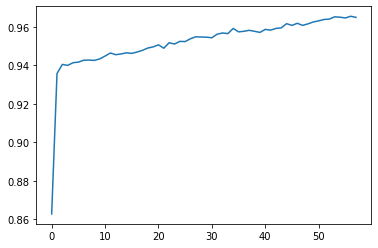

In [5]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)
  
history = classifier.fit(X_train, y_train, batch_size = 25, 
                    epochs = 600, validation_data =(X_val, y_val), 
                    callbacks =[earlystopping])
plt.plot(history.history['binary_accuracy'])

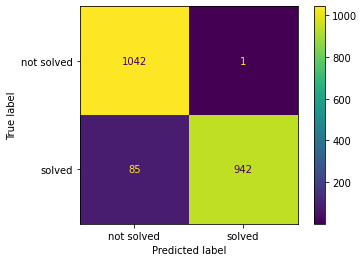

In [6]:
from keras.metrics import accuracy
pred = classifier.predict(X_val)
for i in range(len(pred)):
  if(pred[i][0]>0.9):
    pred[i] = 1
  else:
    pred[i]=0

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val, pred, labels=[0, 1])
cmd = ConfusionMatrixDisplay(cm, display_labels=['not solved', 'solved'])
cmd.plot()

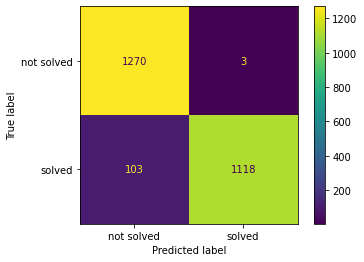

In [7]:
from keras.metrics import accuracy
pred = classifier.predict(X_test)
for i in range(len(pred)):
  if(pred[i][0]>0.9):
    pred[i] = 1
  else:
    pred[i]=0

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred, labels=[0, 1])
cmd = ConfusionMatrixDisplay(cm, display_labels=['not solved', 'solved'])
cmd.plot()

In [8]:
df = pd.read_csv('/content/sample_data/C-instances-runtime-analysis.csv')
#df = df[df['n/m']!=2]

shuffled = df.sample(frac=1).reset_index()

columns_dont_want = ['y', 'index', 'inst.name','type', 'CPLEXStatus'] 
select = [x for x in shuffled.columns if x not in columns_dont_want]

X = shuffled.loc[:, select]

y = shuffled.loc[:,'y']
print(X.head())

   subtype  class  indeks    n   m    n/m   (n/m)^2      (n/m)^3       m/n  \
0       11      4      10   54   9   6.00   36.0000   216.000000  0.166667   
1        4      1       5   22   8   2.75    7.5625    20.796875  0.363636   
2       13      4      10  200  20  10.00  100.0000  1000.000000  0.100000   
3        2      6       9   36  16   2.25    5.0625    11.390625  0.444444   
4        9      4       3   72  16   4.50   20.2500    91.125000  0.222222   

    (m/n)^2   (m/n)^3   av.length    std.dev  median  range  min  max   k  
0  0.027778  0.004630  102.907410  19.859192   103.5     80   62  142  38  
1  0.132231  0.048084   39.045456  23.935385    38.5     82    5   87  21  
2  0.010000  0.001000   99.264999  20.517794    99.0    104   42  146  75  
3  0.197531  0.087791   87.527779  29.969969    88.5    102   36  138  30  
4  0.049383  0.010974   99.652779  18.667709   100.0     81   63  144  43  


In [9]:
y_new = []
for val in y:
  if(val<10):
    y_new.append(0)
  elif(10 <= val and val <100):
    y_new.append(1)
  elif(100<=val and val<1000):
    y_new.append(2)
  else:
    y_new.append(3)

shuffled['y_new'] = y_new
y_encoded = shuffled.loc[:,'y_new']
y_new = np.array(y_new)

X_modified = X

In [10]:
from imblearn.over_sampling import RandomOverSampler

names = [ 'av.length','max','std.dev', 'n', 'm']
X_modified = X.drop([ 'k', 'n/m', 'median', 'range',   'min','indeks', 'class',  'subtype', '(m/n)^3', '(m/n)^2', '(n/m)^2', '(n/m)^3','m/n'], axis = 1)
print(X_modified.head())

oversample = RandomOverSampler(random_state=0)
#oversample.fit(X_modified, y_encoded)
X_modified, y_encoded = oversample.fit_resample(X_modified, y_encoded)

     n   m   av.length    std.dev  max
0   54   9  102.907410  19.859192  142
1   22   8   39.045456  23.935385   87
2  200  20   99.264999  20.517794  146
3   36  16   87.527779  29.969969  138
4   72  16   99.652779  18.667709  144


In [11]:
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

l_encode = LabelEncoder()
l_encode.fit(y_encoded)
y_encoded = l_encode.transform(y_encoded)
y_encoded = to_categorical(y_encoded)

In [12]:
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X_modified, y_encoded, random_state=0, train_size = 0.9)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=0, train_size = 0.9)
print(X_train.shape[0])
print(X_val.shape[0])
print(X_test.shape[0])

X_train = sc.fit_transform(X_train)
X_test_copy = X_test
X_test = sc.transform(X_test)
X_val_copy = X_val
X_val = sc.transform(X_val)

10121
1125
1250


In [13]:
pred = classifier.predict(X_train)
for i in range(len(pred)):
  if(pred[i][0]>0.2):
    pred[i] = 1
  else:
    pred[i]=0
X_train = pd.DataFrame(X_train, columns = names)
X_train['CPLEX'] = pred

In [14]:
pred = classifier.predict(X_val)
for i in range(len(pred)):
  if(pred[i][0]>0.2):
    pred[i] = 1
  else:
    pred[i]=0
X_val = pd.DataFrame(X_val, columns = names)
X_val['CPLEX'] = pred

In [15]:
pred = classifier.predict(X_test)
for i in range(len(pred)):
  if(pred[i][0]>0.2):
    pred[i] = 1
  else:
    pred[i]=0
X_test = pd.DataFrame(X_test, columns = names)
X_test['CPLEX'] = pred
print(X_test.head())

   av.length       max   std.dev         n         m  CPLEX
0   1.467268 -0.456408 -0.658397 -0.474348 -0.607941    0.0
1   0.823191  0.172313 -0.586185 -0.585939 -0.607941    1.0
2   0.857089  1.968660 -0.382955 -0.057951 -0.191279    1.0
3   1.162179  1.968660  3.111856  2.593288  3.230814    0.0
4   1.501167  0.531583 -0.366847 -0.016749 -0.023931    0.0


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier2 = Sequential()
classifier2.add(Dense(4, input_dim = X_modified.shape[1]+1, activation='relu'))

classifier2.add(Dense(8, activation = 'relu'))


classifier2.add(Dense(64, activation='relu'))
classifier2.add(Dropout(0.5))

classifier2.add(Dense(8, activation='relu'))

classifier2.add(Dense(4, activation='relu'))

classifier2.add(Dense(4, activation = 'softmax'))
classifier2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Epoch 1/600
317/317 [==============================] - 1s 3ms/step - loss: 1.2057 - accuracy: 0.4284 - val_loss: 0.9885 - val_accuracy: 0.5991
Epoch 2/600
317/317 [==============================] - 1s 2ms/step - loss: 0.9102 - accuracy: 0.6265 - val_loss: 0.8054 - val_accuracy: 0.6916
Epoch 3/600
317/317 [==============================] - 1s 2ms/step - loss: 0.7787 - accuracy: 0.6795 - val_loss: 0.7136 - val_accuracy: 0.7262
Epoch 4/600
317/317 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.7038 - val_loss: 0.6068 - val_accuracy: 0.7404
Epoch 5/600
317/317 [==============================] - 1s 2ms/step - loss: 0.6292 - accuracy: 0.7341 - val_loss: 0.5685 - val_accuracy: 0.7591
Epoch 6/600
317/317 [==============================] - 1s 2ms/step - loss: 0.6028 - accuracy: 0.7437 - val_loss: 0.5571 - val_accuracy: 0.7707
Epoch 7/600
317/317 [==============================] - 1s 2ms/step - loss: 0.5869 - accuracy: 0.7535 - val_loss: 0.5494 - val_accuracy: 0.7742

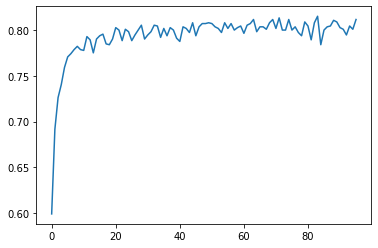

In [17]:
from keras.metrics import accuracy
from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 12, 
                                        restore_best_weights = True)
  
history = classifier2.fit(X_train, y_train, batch_size = 32, 
                    epochs = 600, validation_data =(X_val, y_val), 
                    callbacks =[earlystopping])
plt.plot(history.history['val_accuracy'])

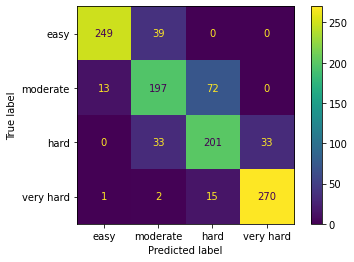

In [18]:
from keras.metrics import accuracy
pred = classifier2.predict(X_val)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_val), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
cmd.plot()

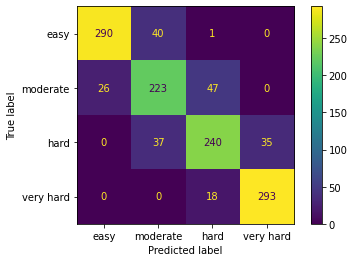

In [19]:
from keras.metrics import accuracy
pred = classifier2.predict(X_test)
pred_ = np.argmax(pred, axis = 1)
pred_ = l_encode.inverse_transform(pred_)

true_y = l_encode.inverse_transform(np.argmax(to_categorical(y_test), axis = 1)[:,1])
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(true_y, pred_, labels=[0, 1, 2, 3])
cmd = ConfusionMatrixDisplay(cm, display_labels=['easy','moderate', 'hard', 'very hard'])
cmd.plot()

ROC AUC score: 0.8905279607827778


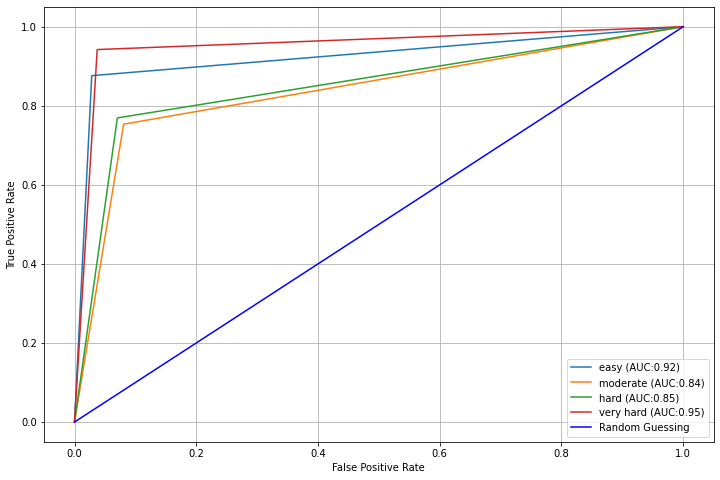

In [20]:
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score


target= ['easy', 'moderate', 'hard', 'very hard']

fig, c_ax = plt.subplots(1,1, figsize = (12, 8))

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)

    for (idx, c_label) in enumerate(target):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(true_y, pred_))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.grid()
plt.show()